In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
empl = pd.read_csv("D:\Data Science\employee.csv")

In [15]:
empl.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [16]:
empl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# Reset the index as "name"

In [24]:
empl.set_index('name',inplace = True)

In [25]:
empl

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,0,45.0,NaN,NaN,Operations,G3,723
S Kumar,1,NaN,16000.0,F,Finance,G0,520
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Ying Chin,3,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,4,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,5,NaN,62000.0,NaN,Sales,G3,649
James Authur,6,54.0,NaN,F,Operations,G3,53
Josh Wills,7,54.0,52000.0,F,Finance,G3,901
Leo Duck,8,23.0,98000.0,M,Sales,G4,709


# Rows for specific names Jack Morgan and Josh wills

In [26]:
empl.loc[['Jack Morgan','Josh Wills']]

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Josh Wills,7,54.0,52000.0,F,Finance,G3,901


# Select data for multiple values "Sales" and “Finance”

In [28]:
emp_values = empl[empl['department'].isin(['Sales', 'Finance'])]

In [29]:
emp_values

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
S Kumar,1,NaN,16000.0,F,Finance,G0,520
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Ying Chin,3,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,5,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,7,54.0,52000.0,F,Finance,G3,901
Leo Duck,8,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 700 performance score

In [38]:
p=[empl['performance_score']>700]


In [32]:
highp=empl.loc[p].index

In [33]:
highp

Index(['Allen Smith', 'Dheeraj Patel', 'Josh Wills', 'Leo Duck'], dtype='object', name='name')

# Display employee who has more than 500 and less than 700 performance score

In [34]:
p1=(empl['performance_score']>500) & (empl['performance_score']<700)

In [35]:
highp1=empl.loc[p1].index
highp1

Index(['S Kumar', 'Jack Morgan', 'Ying Chin', 'Satyam Sharma'], dtype='object', name='name')

# Check and handle missing values in the dataset.

In [39]:
empl.isnull().sum()

index                0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [40]:
empl

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,0,45.0,NaN,NaN,Operations,G3,723
S Kumar,1,NaN,16000.0,F,Finance,G0,520
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Ying Chin,3,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,4,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,5,NaN,62000.0,NaN,Sales,G3,649
James Authur,6,54.0,NaN,F,Operations,G3,53
Josh Wills,7,54.0,52000.0,F,Finance,G3,901
Leo Duck,8,23.0,98000.0,M,Sales,G4,709


In [41]:
for i in ['age','income']:
    empl[i]=empl[i].fillna(empl[i].median())

In [42]:
empl

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,0,45.0,52000.0,NaN,Operations,G3,723
S Kumar,1,45.0,16000.0,F,Finance,G0,520
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Ying Chin,3,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,4,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,5,45.0,62000.0,NaN,Sales,G3,649
James Authur,6,54.0,52000.0,F,Operations,G3,53
Josh Wills,7,54.0,52000.0,F,Finance,G3,901
Leo Duck,8,23.0,98000.0,M,Sales,G4,709


In [43]:
empl['gender']=empl['gender'].fillna(empl['gender'].mode()[0])
empl

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,0,45.0,52000.0,F,Operations,G3,723
S Kumar,1,45.0,16000.0,F,Finance,G0,520
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Ying Chin,3,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,4,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,5,45.0,62000.0,F,Sales,G3,649
James Authur,6,54.0,52000.0,F,Operations,G3,53
Josh Wills,7,54.0,52000.0,F,Finance,G3,901
Leo Duck,8,23.0,98000.0,M,Sales,G4,709


In [44]:
empl.isnull().sum()

index                0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

# Check the outliers and handle outliers in performance score using Percentiles

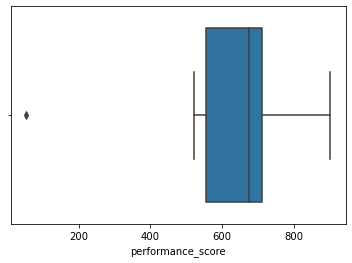

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x=empl['performance_score'])
plt.show()

In [46]:
Q1=np.percentile(empl['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(empl['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(empl['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('Q1 : ',Q1,'\n'
     'Q2 : ',Q2,'\n'
     'Q3 : ',Q3)
print('IQR : ',IQR)
print('lower-limit : ',low_lim)
print('upper-limit : ',up_lim)

Q1 :  556.0 
Q2 :  674.0 
Q3 :  711.0
IQR :  155.0
lower-limit :  323.5
upper-limit :  943.5


In [48]:
outlier=[]
for x in empl['performance_score']:
    if((x<low_lim) or (x>up_lim)):
        outlier.append(x)
print('outlier values are: ',outlier)   

outlier values are:  [53]


In [50]:
ind1=empl['performance_score']<low_lim
empl.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [51]:
empl.drop(['James Authur'],inplace=True)
empl

,index,age,income,gender,department,grade,performance_score
name,,,,,,,
Allen Smith,0,45.0,52000.0,F,Operations,G3,723
S Kumar,1,45.0,16000.0,F,Finance,G0,520
Jack Morgan,2,32.0,35000.0,M,Finance,G2,674
Ying Chin,3,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,4,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,5,45.0,62000.0,F,Sales,G3,649
Josh Wills,7,54.0,52000.0,F,Finance,G3,901
Leo Duck,8,23.0,98000.0,M,Sales,G4,709


# Check the gender column and do Dummy encoding

In [52]:
empl['gender'].nunique()

2

In [53]:
gender_encode = pd.get_dummies(empl['gender'], prefix='gender', columns='gender_male', drop_first=True)
gender_encode

,gender_M
name,
Allen Smith,0
S Kumar,0
Jack Morgan,1
Ying Chin,0
Dheeraj Patel,0
Satyam Sharma,0
Josh Wills,0
Leo Duck,1


# .Do the standard scaling on the feature performance score

In [54]:
empl['performance_score']

name
Allen Smith      723
S Kumar          520
Jack Morgan      674
Ying Chin        556
Dheeraj Patel    711
Satyam Sharma    649
Josh Wills       901
Leo Duck         709
Name: performance_score, dtype: int64

In [55]:
empl['performance_score'].describe()

count      8.00000
mean     680.37500
std      116.16729
min      520.00000
25%      625.75000
50%      691.50000
75%      714.00000
max      901.00000
Name: performance_score, dtype: float64

In [56]:
type(empl['performance_score'])

pandas.core.series.Series

In [57]:
arr=np.array(empl['performance_score']).reshape(-1,1)
arr

array([[723],
       [520],
       [674],
       [556],
       [711],
       [649],
       [901],
       [709]], dtype=int64)

In [60]:
from sklearn import preprocessing


In [62]:
scaler=preprocessing.StandardScaler()
scaled_performance_score=pd.DataFrame(scaler.fit_transform(arr),columns=['performance_score'])
scaled_performance_score

,performance_score
0,0.392262
1,-1.475872
2,-0.058667
3,-1.144578
4,0.281831
5,-0.288733
6,2.030331
7,0.263425
